# Blood Transfusion Service Center Data Set 
*link:http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center*

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv('transfusion.txt')
features = data.drop(['donated'], axis=1).to_numpy()
labels = data['donated'].to_numpy()
k = 5
train1, test1, train2, test2 = train_test_split(features, labels, test_size=0.1)
test_labels = np.zeros(len(test2))

In [13]:
def manhattan_distance(sample, query):
    sum_of_distance = 0

    for i in range(len(sample)):
        sum_of_distance += abs(sample[i] - query[i])
    return sum_of_distance

In [14]:
def knn_algorithm(features, labels, query):

    all_neighbors = []
    for index, sample in enumerate(features):
        distance = manhattan_distance(sample, query)
        all_neighbors.append((distance, index))

    sortedNeighbors = sorted(all_neighbors)

    knnNeighborDist = sortedNeighbors[:k]

    return knnNeighborDist


def knntest():
    correct = 0
    counter = 0
    for x in test1:
        knnNeighborDist = knn_algorithm(train1, train2, query=x)
        knn_labels = np.array([train2[index]
                             for _, index in knnNeighborDist])                      
        knn_neighbors = np.array([train1[index]
                                for _, index in knnNeighborDist])
        predicted_class = mode(knn_labels)
        test_labels[counter] = predicted_class[0]
        counter += 1
    for x in range(0, len(test2)):
        if test_labels[x] == test2[x]:
            correct += 1
    accuracy = ((correct / len(test2)) * 100)
    print('Accuracy:{}%'.format(accuracy))

knntest()

Accuracy:73.33333333333333%


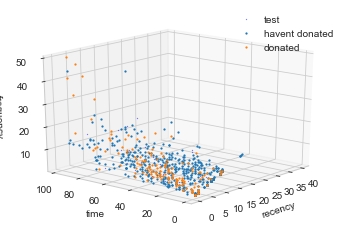

In [15]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = test1[:,0]
y = test1[:,3]
z = test1[:,1]
ax.plot(x, y, z, 'ob', label='test', markersize=0.2)

#Didnt Donate blood in March 
x0 = train1[train2 == 0, 0]
y0 = train1[train2 == 0, 3]
z0 = train1[train2 == 0, 1]
ax.plot(x0,y0,z0, 'o',label='havent donated', markersize=1.2)  

#Donated blood in March  
x1 = train1[train2 == 1, 0]
y1 = train1[train2 == 1, 3]
z1 = train1[train2 == 1, 1]
ax.plot(x1,y1,z1, 'o',label='donated', markersize=1.2)

# rotate the axes
for angle in range(0, 360):
    ax.view_init(20, -140)

ax.legend()
ax.set_xlabel('recency')
ax.set_ylabel('time')
ax.set_zlabel('frequency')
plt.show()